In [2]:
#import the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib as mlp
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df_Suicide=pd.read_csv('master.csv')
df_Suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
#get summary of the data

df_Suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
#check data types for each columns
df_Suicide.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [6]:
#check the number of columns and rows
df_Suicide.shape

(27820, 12)

In [7]:
df_Suicide.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


# Data Cleaning and Wrangling

In [8]:
#check for possible null values in the data
df_Suicide.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
#fill null values with mean.
df_Suicide['HDI for year'] = (pd.to_numeric
                              (df_Suicide['HDI for year'],
                               errors='coerce'))


mean_df_Suicide= (df_Suicide
                  ['HDI for year']
                  .mean())

df_Suicide['HDI for year']= (df_Suicide
             ['HDI for year']
             .fillna
             (mean_df_Suicide))

df_Suicide['HDI for year']=df_Suicide['HDI for year'].astype(float)

In [10]:
df_Suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        27820 non-null  float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [11]:
#confirm correction
df_Suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        27820 non-null  float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [12]:
#check for duplicates
df_Suicide.duplicated().sum()

0

# Descriptive Analysis

In [13]:
#get the summary breakdown of the data
df_Suicide.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.051192,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.776601,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.776601,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.776601,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [14]:
#value counts for countries
df_Suicide['country'].value_counts()

country
Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: count, Length: 101, dtype: int64

In [15]:
#value counts for sex
(df_Suicide
 ['sex']
 .value_counts()
)

sex
male      13910
female    13910
Name: count, dtype: int64

In [16]:
#value counts for age
(df_Suicide
 ['age']
 .value_counts()
)

age
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: count, dtype: int64

In [17]:
#value counts for generation
(df_Suicide
 ['generation']
 .value_counts()
)

generation
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: count, dtype: int64

In [18]:
numerical_df_Suicide=df_Suicide.select_dtypes(include=['float64', 'int64'])
numerical_df_Suicide.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.209036,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.062669,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.057279,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.037290,0.001785
HDI for year,0.209036,0.062669,0.057279,0.037290,1.000000,0.505505
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.505505,1.000000


# PREPARE DATA FOR VISUALIZATION

In [19]:
df_population= (
    df_Suicide
    .loc[:, ['sex', 'population']]
    .groupby(['sex'])
    .mean('population')
    .sort_values('population')
)

df_population.head()

,population
sex,
male,1.800818e+06
female,1.888769e+06


In [20]:
df_suicide_no_by_sex= (
    df_Suicide
    .loc[:, ['sex', 'suicides_no']]
    .groupby(['sex'])
    .mean('suicides_no')
    .sort_values('suicides_no')
)

df_suicide_no_by_sex.head()

,suicides_no
sex,
female,112.114306
male,373.034508


In [21]:
df_suicide_no_by_age= (
    df_Suicide
    .loc[:, ['age', 'suicides_no']]
    .groupby(['age'])
    .mean('suicides_no')
    .sort_values('suicides_no')
)

df_suicide_no_by_age.head()

,suicides_no
age,
5-14 years,11.337093
75+ years,140.697544
15-24 years,174.179664
25-34 years,242.118053
55-74 years,357.269065


In [22]:
df_age_by_population= (
    df_Suicide
    .loc[:, ['age', 'population']]
    .groupby(['age'])
    .sum('population')
    .sort_values('population')
)

df_age_by_population.head()

,population
age,
75+ years,2663281253
5-14 years,8398693237
25-34 years,8438103587
15-24 years,8642946896
55-74 years,8803245340


In [23]:
df_generation_by_population= (
    df_Suicide
    .loc[:, ['generation', 'population']]
    .groupby(['generation'])
    .mean('population')
    .sort_values('population')
)

df_generation_by_population.head()

,population
generation,
G.I. Generation,7.748552e+05
Silent,1.448826e+06
Generation Z,1.703090e+06
Millenials,1.822290e+06
Generation X,2.102389e+06


In [24]:
df_hdi_gdp_overtime = ( df_Suicide
                       .groupby('year')
                       .agg({'HDI for year':'mean',
                             'gdp_per_capita ($)':'mean'}
                           )
                      )

df_hdi_gdp_overtime

,HDI for year,gdp_per_capita ($)
year,,
1985,0.716909,6091.229167
1986,0.776601,7126.104167
1987,0.776601,8712.592593
1988,0.776601,9983.857143
1989,0.776601,9725.038462
1990,0.729100,9806.328125
1991,0.776601,10132.937500
1992,0.776601,10506.707692
1993,0.776601,10553.584615


# Data Visualization

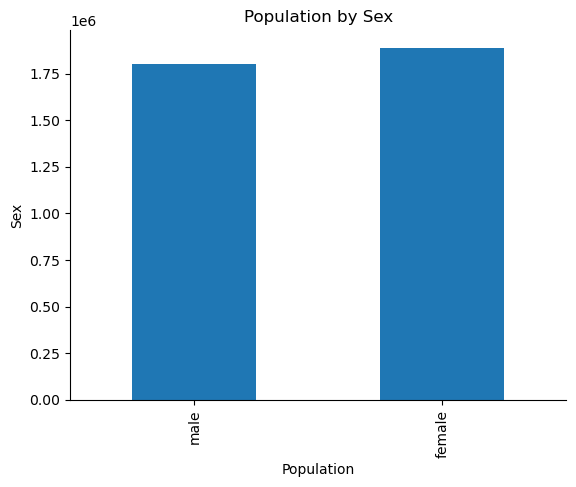

In [25]:
#use seaborn for the analysis

import seaborn as sns
(df_population
  .plot
  .bar(
      title='Population by Sex',
      xlabel='Population',
      ylabel='Sex',
      legend=None
  )
 )
sns.despine()

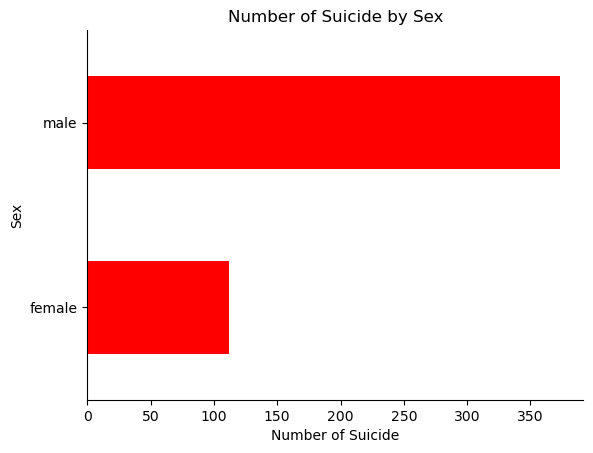

In [27]:
(df_suicide_no_by_sex
 .plot
 .barh(
     title='Number of Suicide by Sex',
     xlabel='Number of Suicide',
     ylabel='Sex',
     color='red',
     legend=None
 )

)

sns.despine()

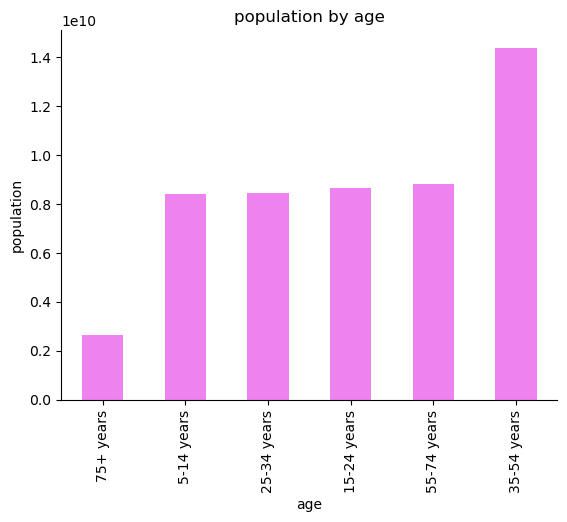

In [28]:
(df_age_by_population
 .plot
 .bar(
     title= 'population by age',
     xlabel='age',
     ylabel='population',
     color='violet',
     legend=None
 )

)

sns.despine()

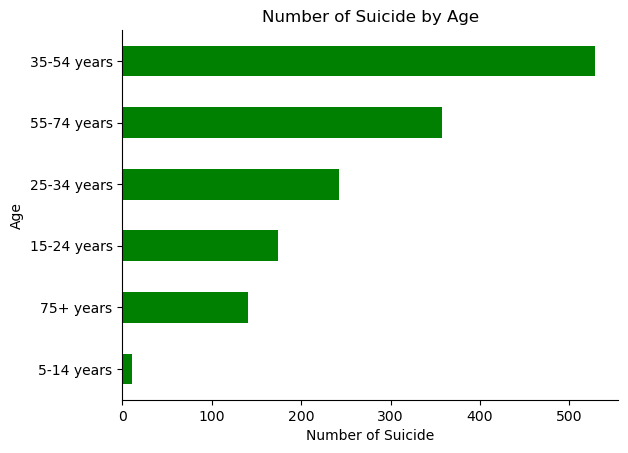

In [29]:
(df_suicide_no_by_age
 .plot
 .barh(
     title='Number of Suicide by Age',
     xlabel='Number of Suicide',
     ylabel='Age',
     color='Green',
     legend=None
 )
)

sns.despine()

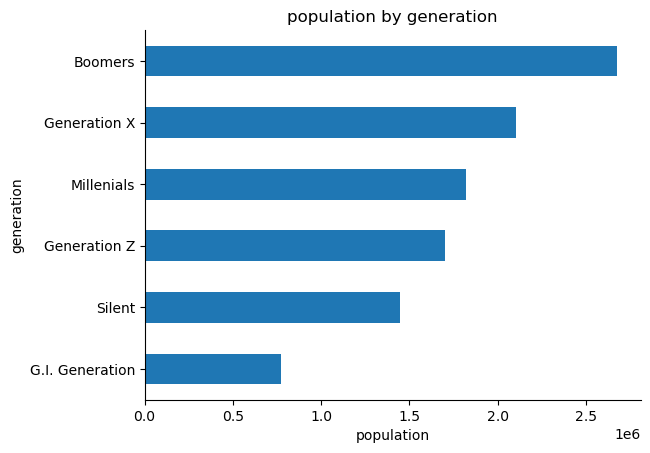

In [30]:
(df_generation_by_population
 .plot
 .barh(
     title='population by generation',
     ylabel='generation',
     xlabel='population',
     legend=None
 ))

sns.despine()

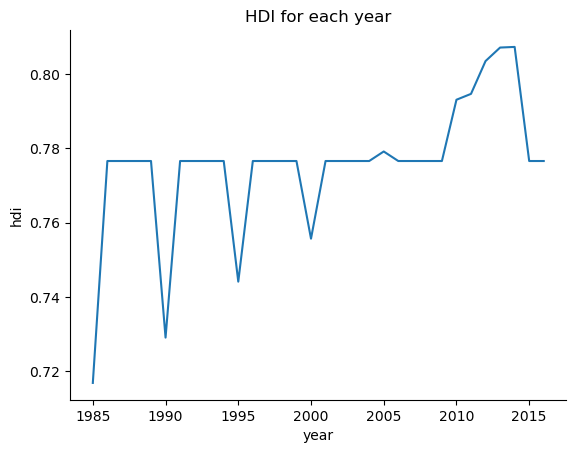

In [31]:
(df_hdi_gdp_overtime
 ['HDI for year']
 .plot(title='HDI for each year',
       ylabel='hdi'
))

sns.despine()

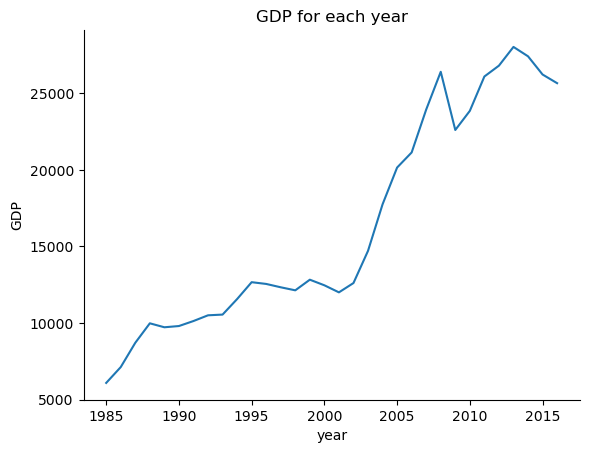

In [32]:
(df_hdi_gdp_overtime
 ['gdp_per_capita ($)']
 .plot(title='GDP for each year',
       ylabel='GDP'
)
)

sns.despine()